# Importing Libraries and Dataset

In [24]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [25]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [26]:
# Import the Dataset
df = pd.read_csv('/Users/wiltonngo/Apartment Rentals/ Data/Prepared Data/app2.csv')

In [27]:
df.head()

,Unnamed: 0,State,Service Charge,Heating Type,Telekom-Tv Offer,Newly Construction,Balcony,Picture_count,Price_Trend,Telekom Upload Speed,...,Base Rent,Living Space,Pets Allowed,Lift,Type Of Flat,Rooms,Floor,Garden,date,Cost_Of_living
0,0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,...,595.00,86.00,NaN,False,ground_floor,4.0,1.0,True,May19,Median
1,2,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,...,965.00,83.80,NaN,True,apartment,3.0,3.0,False,Oct19,Expensive
2,4,Bremen,138.0,self_contained_central_heating,NaN,False,True,19,2.46,NaN,...,765.00,84.97,NaN,False,apartment,3.0,1.0,False,Feb20,Expensive
3,6,Sachsen,70.0,self_contained_central_heating,ONE_YEAR_FREE,False,False,9,1.01,2.4,...,310.00,62.00,NaN,False,NaN,2.0,1.0,True,Feb20,Cheapest
4,7,Bremen,88.0,central_heating,ONE_YEAR_FREE,False,True,5,1.89,2.4,...,452.25,60.30,NaN,False,ground_floor,3.0,NaN,False,Feb20,Cheapest


In [28]:
# Remove column 'Unnamed: 0'

df.drop('Unnamed: 0', axis = 1, inplace = True)

In [29]:
df.head()

,State,Service Charge,Heating Type,Telekom-Tv Offer,Newly Construction,Balcony,Picture_count,Price_Trend,Telekom Upload Speed,Total Rent,...,Base Rent,Living Space,Pets Allowed,Lift,Type Of Flat,Rooms,Floor,Garden,date,Cost_Of_living
0,Nordrhein_Westfalen,245.0,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.00,...,595.00,86.00,NaN,False,ground_floor,4.0,1.0,True,May19,Median
1,Sachsen,255.0,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.00,...,965.00,83.80,NaN,True,apartment,3.0,3.0,False,Oct19,Expensive
2,Bremen,138.0,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.00,...,765.00,84.97,NaN,False,apartment,3.0,1.0,False,Feb20,Expensive
3,Sachsen,70.0,self_contained_central_heating,ONE_YEAR_FREE,False,False,9,1.01,2.4,380.00,...,310.00,62.00,NaN,False,NaN,2.0,1.0,True,Feb20,Cheapest
4,Bremen,88.0,central_heating,ONE_YEAR_FREE,False,True,5,1.89,2.4,584.25,...,452.25,60.30,NaN,False,ground_floor,3.0,NaN,False,Feb20,Cheapest


In [30]:
# Removing all categorical variables
df.drop(['State', 'Heating Type', 'Telekom-Tv Offer', 'Newly Construction', 'Balcony', 'Cost_Of_living', 'date', 'Garden','Type Of Flat','Lift','Pets Allowed'], axis = 1, inplace = True)

In [31]:
df.drop(['Service Charge','Price_Trend','Telekom Upload Speed','Year Constructed','Floor'],axis=1,inplace=True)
df.drop(['Kitchen','Cellar'],axis=1,inplace=True)

In [32]:
df.head()

,Picture_count,Total Rent,Scout ID,Base Rent,Living Space,Rooms
0,6,840.00,96107057,595.00,86.00,4.0
1,8,1300.00,113147523,965.00,83.80,3.0
2,19,903.00,114751222,765.00,84.97,3.0
3,9,380.00,114391930,310.00,62.00,2.0
4,5,584.25,115270775,452.25,60.30,3.0


In [33]:
df.isnull().sum()

Picture_count    0
Total Rent       0
Scout ID         0
Base Rent        0
Living Space     0
Rooms            0
dtype: int64

# The Elbow Technique

In [34]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [35]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

[-3.573711753925704e+19,
 -9.073101939422479e+18,
 -4.5812177685302943e+18,
 -2.604293567751081e+18,
 -1.7060677617406725e+18,
 -1.2635047206031455e+18,
 -8.858005801166301e+17,
 -6.565268776918435e+17,
 -5.3110919648128e+17]

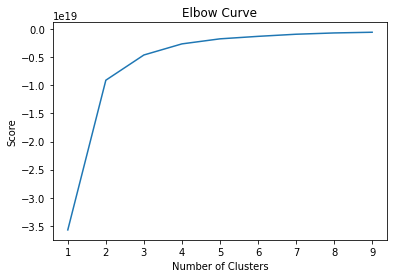

In [36]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Based on the Elbow the number of clusters is 3. After the value of 3 it flatens out

# K-Means Clustering

In [37]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3,) 

In [38]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [39]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

In [40]:
df.head()

,Picture_count,Total Rent,Scout ID,Base Rent,Living Space,Rooms,clusters
0,6,840.00,96107057,595.00,86.00,4.0,0
1,8,1300.00,113147523,965.00,83.80,3.0,1
2,19,903.00,114751222,765.00,84.97,3.0,1
3,9,380.00,114391930,310.00,62.00,2.0,1
4,5,584.25,115270775,452.25,60.30,3.0,1


In [41]:
df['clusters'].value_counts()


1    195618
0     22774
2      9923
Name: clusters, dtype: int64

In [42]:
df[df['Living Space']>10000]

,Picture_count,Total Rent,Scout ID,Base Rent,Living Space,Rooms,clusters
128737,23,1400.0,109350573,1200.0,66100.0,2.0,1
149259,0,369.0,113363197,679.0,111111.0,3.0,1
189743,11,1641.5,109754861,1385.0,10259.0,3.0,1


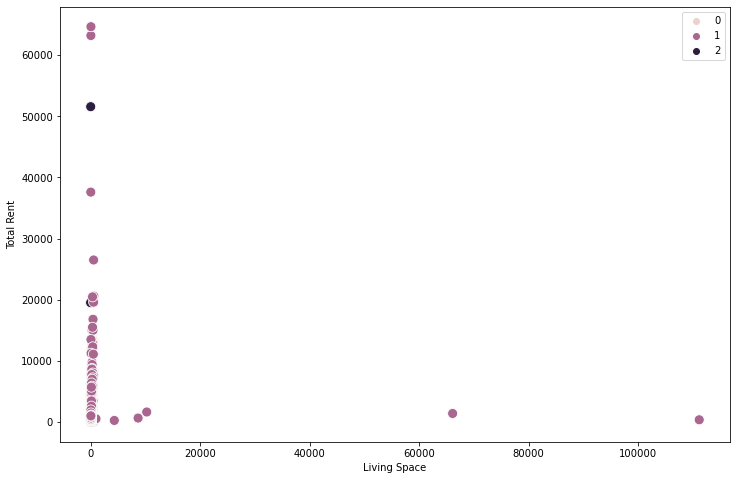

In [43]:
# Plot the clusters for the "Living Spsace" and "Total Rent" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Living Space'], y = df['Total Rent'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Living Space')
plt.ylabel('Total Rent')
plt.show()

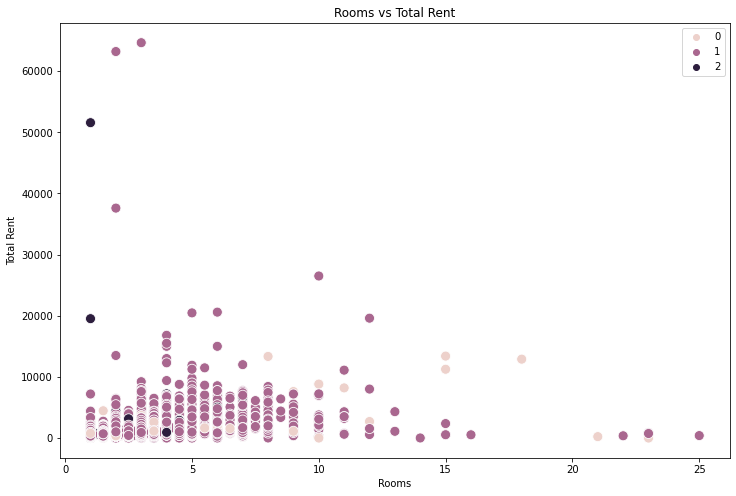

In [45]:
# Plot the clusters for the "Rooms" and "Total Rent" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Rooms'], y = df['Total Rent'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Rooms')
plt.ylabel('Total Rent')
plt.title('Rooms vs Total Rent')
plt.show()

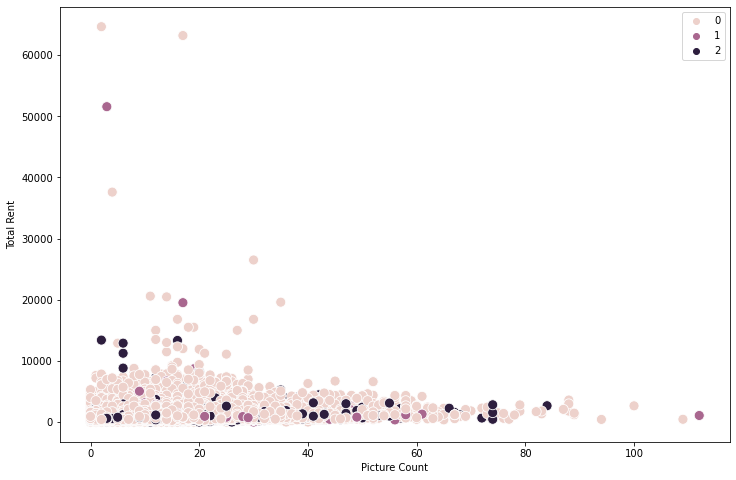

In [31]:
# Plot the clusters for the "Picture_count" and "Total Rent" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['Picture_count'], y = df['Total Rent'], hue = kmeans.labels_, s = 100) 

ax.grid(False)
plt.xlabel('Picture Count')
plt.ylabel('Total Rent')
plt.show()

# Observations
 - For the Most Part Cluster 0 has peformed best in all three plots
 - The Plot for Living Space vs Total Rent shows that more living space the more rent is
 - The Cluster 2 Purple has not been represented for the Rooms vs Total Rent for +4 Rooms



# Descriptive Statistics

In [53]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [56]:
df.groupby('cluster').agg({'Total Rent':['mean', 'median'], 
                         'Rooms':['mean', 'median'], 
                         'Living Space':['mean', 'median'],
                          'Picture_count':['mean', 'median']})

Total Rent              Rooms        Living Space         \
                   mean   median      mean median         mean median   
cluster                                                                 
dark purple  687.284596  570.000  2.514227    2.0    69.178744  64.83   
pink         829.082588  658.755  2.627123    3.0    74.307826  67.00   
purple       749.065100  610.000  2.528529    2.5    70.271969  65.00   

            Picture_count         
                     mean median  
cluster                           
dark purple      9.389174    9.0  
pink             9.842386    9.0  
purple          10.301493    9.0

### The K clustering show some intersting insights. It would be great if we could analyze the categorical analysis and how it impact the Total Rent